
# <center> Escuela Politécnica Nacional </center>

**Nombre:** Sebastián Pazmiño<br>
**Fecha:** Quito, 25 de diciembre de 2025<br>
**Tema:** Eliminación Gaussiana vs Gauss-Jordan<br>
**Repositorio:**<br>
https://github.com/Sebas-p2304/Metodos-Numericos

## **Comparación de complejidad** 
## *Eliminación Gaussiana vs Gauss-Jordan (sumas/restas)*

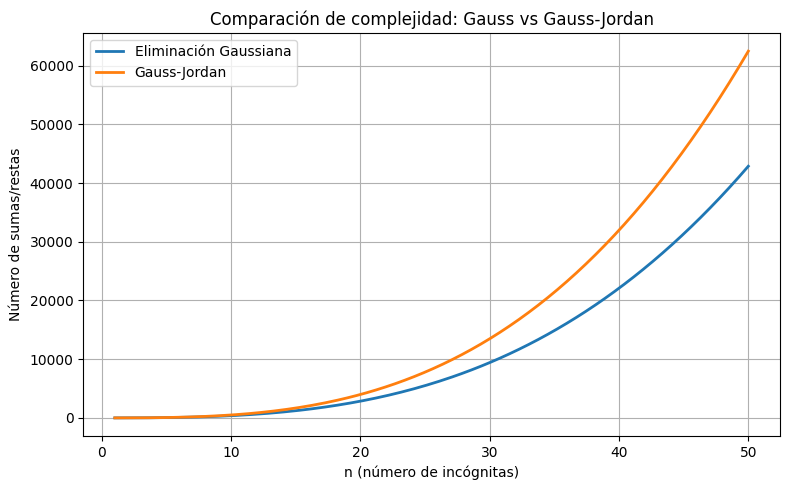

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 50, 200)

# --------------------------------------------------
# Complejidad teórica (sumas/restas)
# --------------------------------------------------
def eliminacion_gaussiana_complex(x):
    # ~ (1/3)n^3 + (1/2)n^2 - (5/6)n
    return x**3 / 3 + x**2 / 2 - 5 * x / 6


def gauss_jordan_complex(x):
    # ~ (1/2)n^3 - (1/2)n
    return x**3 / 2 - x / 2


# --------------------------------------------------
# Evaluación
# --------------------------------------------------
y_gauss = eliminacion_gaussiana_complex(x)
y_gj = gauss_jordan_complex(x)

# --------------------------------------------------
# Gráfica
# --------------------------------------------------
plt.figure(figsize=(8, 5))

plt.plot(x, y_gauss, label="Eliminación Gaussiana", linewidth=2)
plt.plot(x, y_gj, label="Gauss-Jordan", linewidth=2)

plt.xlabel("n (número de incógnitas)")
plt.ylabel("Número de sumas/restas")
plt.title("Comparación de complejidad: Gauss vs Gauss-Jordan")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## **Comparación de complejidad** 
## *Eliminación Gaussiana vs Gauss-Jordan (multiplicaciones/divisiones)*

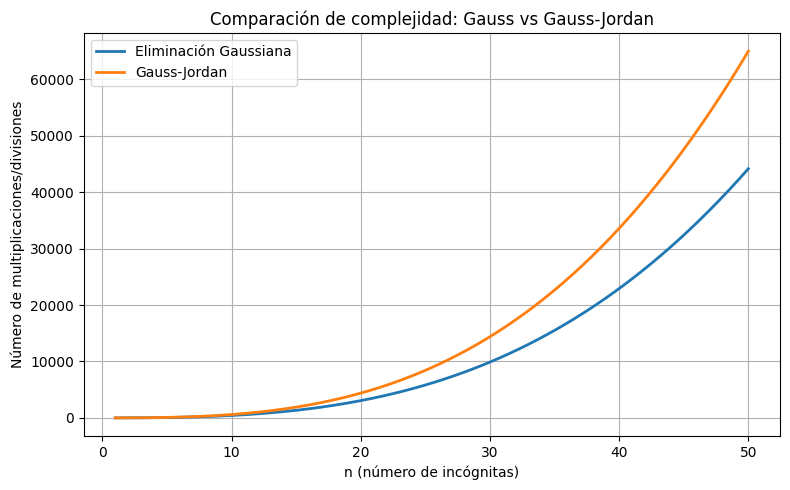

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 50, 200)

# --------------------------------------------------
# Complejidad teórica (multi/div)
# --------------------------------------------------
def eliminacion_gaussiana_complex(x):
    # ~ (1/3)n^3 + (1/2)n^2 - (5/6)n
    return x**3 / 3 + x**2  -   x / 3


def gauss_jordan_complex(x):
    # ~ (1/2)n^3 - (1/2)n
    return x**3 / 2 + x**2 - x / 2


# --------------------------------------------------
# Evaluación
# --------------------------------------------------
y_gauss = eliminacion_gaussiana_complex(x)
y_gj = gauss_jordan_complex(x)

# --------------------------------------------------
# Gráfica
# --------------------------------------------------
plt.figure(figsize=(8, 5))

plt.plot(x, y_gauss, label="Eliminación Gaussiana", linewidth=2)
plt.plot(x, y_gj, label="Gauss-Jordan", linewidth=2)

plt.xlabel("n (número de incógnitas)")
plt.ylabel("Número de multiplicaciones/divisiones")
plt.title("Comparación de complejidad: Gauss vs Gauss-Jordan")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Eliminación Gaussiana con contador de sumas/restas, multipliaciones/divisiones e intercambios de fila.
**Además muestra la complejidad usando la expresión analítica y compara con el valor obtenido de la ejecución**

Expresión analítica para las sumas/restas: $\frac{n^3}{3} + \frac{n^2}{2} - \frac{5n}{6}\\$
Expresión analítica para las multiplicaciones/divisiones: $\frac{n^3}{3} + n^2 - \frac{n}{3}\\$

In [ ]:
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np
def eliminacion_gaussiana(A: np.ndarray | list[list[float | int]]) -> np.ndarray:
 
    sumas_restas = 0
    mult_div = 0
    intercambios = 0

    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)

    assert A.shape[0] == A.shape[1] - 1, \
        "La matriz A debe ser de tamaño n-by-(n+1)."

    n = A.shape[0]

    # ------------------------------------------------
    # Eliminación hacia adelante
    # ------------------------------------------------
    for i in range(n - 1):
        # Buscar pivote
        p = None
        for pi in range(i, n):
            if A[pi, i] != 0:
                if p is None or abs(A[pi, i]) < abs(A[p, i]):
                    p = pi

        if p is None:
            raise ValueError("No existe solución única.")

        if p != i:
            A[[i, p], :] = A[[p, i], :]
            intercambios += 1

        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            mult_div += 1
            for k in range(i, n + 1):
                A[j, k] = A[j, k] - m * A[i, k]
                mult_div += 1
                sumas_restas += 1

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

    # ------------------------------------------------
    # Sustitución hacia atrás
    # ------------------------------------------------
    solucion = np.zeros(n)

    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]
    mult_div += 1

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
            mult_div += 1
            sumas_restas += 1
        solucion[i] = (A[i, n] - suma) / A[i, i]
        sumas_restas += 1
        mult_div += 1

    print("\nGauss:")
    print("Sumas/restas:\n",'expresión analítica:',n**3 / 3 + n**2  -   n / 3,
          '\nreal:', sumas_restas)
    print("Multiplicaciones/divisiones:\n",'expresión analítica:', n**3/3 + n**2 - n/3,
          '\nreal:', mult_div)
    print("Intercambios de fila:", intercambios)

    return solucion


[12-25 18:38:27][INFO] 2025-12-25 18:38:27.505669


## Gauss-Jordan con contador de sumas/restas, multipliaciones/divisiones e intercambios de fila.
**Además muestra la complejidad usando la expresión analítica y compara con el valor obtenido de la ejecución**

Expresión analítica para las sumas/restas: $\frac{n^3}{2} - \frac{n}{2}\\$
Expresión analítica para las multiplicaciones/divisiones: $\frac{n^3}{3} + n^2 - \frac{n}{2}$


In [32]:
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np
def gauss_jordan(A: np.ndarray | list[list[float | int]]) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de Gauss-Jordan
    con contadores de operaciones aritméticas.
    """
    sumas_restas = 0
    mult_div = 0

    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)

    assert A.shape[0] == A.shape[1] - 1, \
        "La matriz A debe ser de tamaño n-by-(n+1)."

    n = A.shape[0]

    for i in range(n):
        # ------------------------------------------------
        # Encontrar pivote
        # ------------------------------------------------
        p = None
        for pi in range(i, n):
            if A[pi, i] != 0:
                if p is None or abs(A[pi, i]) < abs(A[p, i]):
                    p = pi

        if p is None:
            raise ValueError("No existe solución única.")

        if p != i:
            A[[i, p], :] = A[[p, i], :]

        # ------------------------------------------------
        # Normalizar fila pivote
        # ------------------------------------------------
        pivote = A[i, i]
        for k in range(i, n + 1):
            A[i, k] = A[i, k] / pivote
            mult_div += 1

        # ------------------------------------------------
        # Eliminación arriba y abajo
        # ------------------------------------------------
        for j in range(n):
            if j == i:
                continue
            m = A[j, i]
            for k in range(i, n + 1):
                A[j, k] = A[j, k] - m * A[i, k]
                mult_div += 1
                sumas_restas += 1

        logging.info(f"\n{A}")

    solucion = A[:, -1]

    print("\nGauss-Jordan:")
    print("Sumas/restas:\n",'expresión analítica:',n**3/2 - n/2,
          '\nreal:', sumas_restas)
    print("Multiplicaciones/divisiones:\n",'expresión analítica:', n**3/2 + n**2 - n/2,
          '\nreal:', mult_div)

    return solucion


[12-25 18:42:32][INFO] 2025-12-25 18:42:32.629754


##Ejemplo 1

In [ ]:

Ab = [[1, 1, 0, 3, 4], [2, 1, -1, 1, 1], [3, -1, -1, 2, -3], [-1, 2, 3, -1, 4]]

eliminacion_gaussiana(Ab)

[12-25 18:42:36][INFO] 
[[  1.   1.   0.   3.   4.]
 [  0.  -1.  -1.  -5.  -7.]
 [  0.  -4.  -1.  -7. -15.]
 [  0.   3.   3.   2.   8.]]
[12-25 18:42:36][INFO] 
[[  1.   0.  -1.  -2.  -3.]
 [  0.   1.   1.   5.   7.]
 [  0.   0.   3.  13.  13.]
 [  0.   0.   0. -13. -13.]]
[12-25 18:42:36][INFO] 
[[  1.           0.           0.           2.33333333   1.33333333]
 [  0.           1.           0.           0.66666667   2.66666667]
 [  0.           0.           1.           4.33333333   4.33333333]
 [  0.           0.           0.         -13.         -13.        ]]
[12-25 18:42:36][INFO] 
[[ 1.  0.  0.  0. -1.]
 [ 0.  1.  0.  0.  2.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  1.]]

Gauss-Jordan:
Sumas/restas:
 expresión analítica: 30.0 
real: 42
Multiplicaciones/divisiones:
 expresión analítica: 46.0 
real: 56


array([-1.,  2.,  0.,  1.])

In [ ]:

gauss_jordan(Ab)

[12-25 18:38:32][INFO] 
[[  1.   1.   0.   3.   4.]
 [  0.  -1.  -1.  -5.  -7.]
 [  0.  -4.  -1.  -7. -15.]
 [  0.   3.   3.   2.   8.]]
[12-25 18:38:32][INFO] 
[[  1.   1.   0.   3.   4.]
 [  0.  -1.  -1.  -5.  -7.]
 [  0.   0.   3.  13.  13.]
 [  0.   0.   0. -13. -13.]]
[12-25 18:38:32][INFO] 
[[  1.   1.   0.   3.   4.]
 [  0.  -1.  -1.  -5.  -7.]
 [  0.   0.   3.  13.  13.]
 [  0.   0.   0. -13. -13.]]

Gauss:
Sumas/restas:
 expresión analítica: 35.99999999999999 
real: 35
Multiplicaciones/divisiones:
 expresión analítica: 35.99999999999999 
real: 42
Intercambios de fila: 0


array([-1.,  2.,  0.,  1.])

## Ejemplo 2

In [34]:
M1 = [
    [2, -1,  3,  9],
    [1,  1, -1,  1],
    [3, -1,  2,  7]
]

eliminacion_gaussiana(M1)

[12-25 19:03:12][INFO] 
[[ 1.  1. -1.  1.]
 [ 0. -3.  5.  7.]
 [ 0. -4.  5.  4.]]
[12-25 19:03:12][INFO] 
[[ 1.          1.         -1.          1.        ]
 [ 0.         -3.          5.          7.        ]
 [ 0.          0.         -1.66666667 -5.33333333]]

Gauss:
Sumas/restas:
 expresión analítica: 17.0 
real: 16
Multiplicaciones/divisiones:
 expresión analítica: 17.0 
real: 20
Intercambios de fila: 1


array([1.2, 3. , 3.2])

In [35]:
gauss_jordan(M1)

[12-25 19:03:18][INFO] 
[[ 1.  1. -1.  1.]
 [ 0. -3.  5.  7.]
 [ 0. -4.  5.  4.]]
[12-25 19:03:18][INFO] 
[[ 1.          0.          0.66666667  3.33333333]
 [ 0.          1.         -1.66666667 -2.33333333]
 [ 0.          0.         -1.66666667 -5.33333333]]
[12-25 19:03:18][INFO] 
[[1.  0.  0.  1.2]
 [0.  1.  0.  3. ]
 [0.  0.  1.  3.2]]

Gauss-Jordan:
Sumas/restas:
 expresión analítica: 12.0 
real: 18
Multiplicaciones/divisiones:
 expresión analítica: 21.0 
real: 27


array([1.2, 3. , 3.2])

## Ejemplo 3

In [36]:
S2 = [
    [1,  2, -1,  0,  3],
    [2, -1,  1,  1,  4],
    [3,  1, -2,  1,  2],
    [1, -1,  1, -1,  0]
]

eliminacion_gaussiana(S2)

[12-25 19:03:27][INFO] 
[[ 1.  2. -1.  0.  3.]
 [ 0. -5.  3.  1. -2.]
 [ 0. -5.  1.  1. -7.]
 [ 0. -3.  2. -1. -3.]]
[12-25 19:03:27][INFO] 
[[ 1.          2.         -1.          0.          3.        ]
 [ 0.         -3.          2.         -1.         -3.        ]
 [ 0.          0.         -2.33333333  2.66666667 -2.        ]
 [ 0.          0.         -0.33333333  2.66666667  3.        ]]
[12-25 19:03:27][INFO] 
[[  1.           2.          -1.           0.           3.        ]
 [  0.          -3.           2.          -1.          -3.        ]
 [  0.           0.          -0.33333333   2.66666667   3.        ]
 [  0.           0.           0.         -16.         -23.        ]]

Gauss:
Sumas/restas:
 expresión analítica: 35.99999999999999 
real: 35
Multiplicaciones/divisiones:
 expresión analítica: 35.99999999999999 
real: 42
Intercambios de fila: 2


array([1.125 , 2.1875, 2.5   , 1.4375])

In [37]:
gauss_jordan(S2)

[12-25 19:03:35][INFO] 
[[ 1.  2. -1.  0.  3.]
 [ 0. -5.  3.  1. -2.]
 [ 0. -5.  1.  1. -7.]
 [ 0. -3.  2. -1. -3.]]
[12-25 19:03:35][INFO] 
[[ 1.          0.          0.33333333 -0.66666667  1.        ]
 [ 0.          1.         -0.66666667  0.33333333  1.        ]
 [ 0.          0.         -2.33333333  2.66666667 -2.        ]
 [ 0.          0.         -0.33333333  2.66666667  3.        ]]
[12-25 19:03:35][INFO] 
[[  1.   0.   0.   2.   4.]
 [  0.   1.   0.  -5.  -5.]
 [  0.   0.   1.  -8.  -9.]
 [  0.   0.   0. -16. -23.]]
[12-25 19:03:35][INFO] 
[[1.     0.     0.     0.     1.125 ]
 [0.     1.     0.     0.     2.1875]
 [0.     0.     1.     0.     2.5   ]
 [0.     0.     0.     1.     1.4375]]

Gauss-Jordan:
Sumas/restas:
 expresión analítica: 30.0 
real: 42
Multiplicaciones/divisiones:
 expresión analítica: 46.0 
real: 56


array([1.125 , 2.1875, 2.5   , 1.4375])

## Ejemplo 4

In [38]:
A5 = [
    [ 2, -1,  0,  1,  3,  5],
    [ 1,  1, -1,  2, -1,  2],
    [ 3,  0,  1, -1,  2,  4],
    [-1,  2,  1,  1,  0,  1],
    [ 1, -1,  2,  0,  1,  3]
]
eliminacion_gaussiana(A5)

[12-25 19:03:42][INFO] 
[[ 1.  1. -1.  2. -1.  2.]
 [ 0. -3.  2. -3.  5.  1.]
 [ 0. -3.  4. -7.  5. -2.]
 [ 0.  3.  0.  3. -1.  3.]
 [ 0. -2.  3. -2.  2.  1.]]
[12-25 19:03:42][INFO] 
[[ 1.   1.  -1.   2.  -1.   2. ]
 [ 0.  -2.   3.  -2.   2.   1. ]
 [ 0.   0.  -0.5 -4.   2.  -3.5]
 [ 0.   0.   4.5  0.   2.   4.5]
 [ 0.   0.  -2.5  0.   2.  -0.5]]
[12-25 19:03:42][INFO] 
[[  1.    1.   -1.    2.   -1.    2. ]
 [  0.   -2.    3.   -2.    2.    1. ]
 [  0.    0.   -0.5  -4.    2.   -3.5]
 [  0.    0.    0.  -36.   20.  -27. ]
 [  0.    0.    0.   20.   -8.   17. ]]
[12-25 19:03:42][INFO] 
[[ 1.   1.  -1.   2.  -1.   2. ]
 [ 0.  -2.   3.  -2.   2.   1. ]
 [ 0.   0.  -0.5 -4.   2.  -3.5]
 [ 0.   0.   0.  20.  -8.  17. ]
 [ 0.   0.   0.   0.   5.6  3.6]]

Gauss:
Sumas/restas:
 expresión analítica: 64.99999999999999 
real: 64
Multiplicaciones/divisiones:
 expresión analítica: 64.99999999999999 
real: 75
Intercambios de fila: 3


array([1.03571429, 0.10714286, 0.71428571, 1.10714286, 0.64285714])

In [39]:
gauss_jordan(A5)

[12-25 19:03:52][INFO] 
[[ 1.  1. -1.  2. -1.  2.]
 [ 0. -3.  2. -3.  5.  1.]
 [ 0. -3.  4. -7.  5. -2.]
 [ 0.  3.  0.  3. -1.  3.]
 [ 0. -2.  3. -2.  2.  1.]]
[12-25 19:03:52][INFO] 
[[ 1.   0.   0.5  1.   0.   2.5]
 [ 0.   1.  -1.5  1.  -1.  -0.5]
 [ 0.   0.  -0.5 -4.   2.  -3.5]
 [ 0.   0.   4.5  0.   2.   4.5]
 [ 0.   0.  -2.5  0.   2.  -0.5]]
[12-25 19:03:52][INFO] 
[[  1.   0.   0.  -3.   2.  -1.]
 [  0.   1.   0.  13.  -7.  10.]
 [  0.   0.   1.   8.  -4.   7.]
 [  0.   0.   0. -36.  20. -27.]
 [  0.   0.   0.  20.  -8.  17.]]
[12-25 19:03:52][INFO] 
[[ 1.    0.    0.    0.    0.8   1.55]
 [ 0.    1.    0.    0.   -1.8  -1.05]
 [ 0.    0.    1.    0.   -0.8   0.2 ]
 [ 0.    0.    0.    1.   -0.4   0.85]
 [ 0.    0.    0.    0.    5.6   3.6 ]]
[12-25 19:03:52][INFO] 
[[1.         0.         0.         0.         0.         1.03571429]
 [0.         1.         0.         0.         0.         0.10714286]
 [0.         0.         1.         0.         0.         0.71428571]
 [0.     

array([1.03571429, 0.10714286, 0.71428571, 1.10714286, 0.64285714])